### Combined Models on Filtered Twitter Sentiment Data

#### ML Models Trained on Dataset Labels

##### Importing Necessary Packages and Loading Dataset

In [1]:
import pandas as pd
import nltk 

# Download the lexicon
nltk.download("vader_lexicon")

# Import the lexicon 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tessanderson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_json(path_or_buf='train.jsonl', lines=True)
df.head()

,text,label
0,The project will make a significant contributi...,1
1,"So in -- first of all, the segments, we are --...",0
2,Building a smarter and stronger energy grid th...,0
3,"Generally, first of all our Transmission depar...",0
4,"But for the most part, our challenge is showin...",0


In [3]:
df.info()
df['text'] = df['text'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2117 non-null   object
 1   label   2117 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2117 non-null   string
 1   label   2117 non-null   int64 
dtypes: int64(1), string(1)
memory usage: 33.2 KB


##### Filtering Data by Relevant Keywords

In [4]:
nltk.download('punkt')  # Download the punkt tokenizer if not already downloaded

df['tokens'] = df['text'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tessanderson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
keywords = ["sustainability", "environmental", "conservation", "recycling", "sustainable",
                         "responsibility", "green", "eco-friendly", "renewable", "carbon", "climate", "ecosystem",
                         "planet", "biodiversity", "energy", "water", "pollution", "reduction", "renewability", 
                         "ecological", "renewable", "greenhouse", "clean", "solar", "wind", "earth", "sustainable", 
                         "planet", "ecology", "ocean", "forest", "organic", "earth-friendly", "bio", "ethics", 
                         "conservationist", "sustain", "renew", "ethical", "greenery", "saver", "sustainable", 
                         "conservator", "recycler", "biodegradable", "natural", "greenery", "environment", 
                         "saver", "earth-saving", "sustainability", "green-living", "clean", "responsible", 
                         "preservation", "regeneration", "ecosystem", "safeguarding"]
filtered_df = df[df['tokens'].apply(lambda tokens: any(keyword in tokens for keyword in keywords))]

In [6]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 820 entries, 0 to 2115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    820 non-null    string
 1   label   820 non-null    int64 
 2   tokens  820 non-null    object
dtypes: int64(1), object(1), string(1)
memory usage: 25.6+ KB


In [7]:
filtered_df.head()

,text,label,tokens
0,The project will make a significant contributi...,1,"[The, project, will, make, a, significant, con..."
2,Building a smarter and stronger energy grid th...,0,"[Building, a, smarter, and, stronger, energy, ..."
5,Our ambition is to be the preferred energy com...,0,"[Our, ambition, is, to, be, the, preferred, en..."
6,Our Environmentally Preferable Purchasing Guid...,1,"[Our, Environmentally, Preferable, Purchasing,..."
12,"In this way, it offers all occupants a more co...",0,"[In, this, way, ,, it, offers, all, occupants,..."


##### Machine Learning Models trained on Dataset Labels

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = filtered_df.text.values
y = filtered_df.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(max_iter=1000))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [10]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [11]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
Dataset_acc_list = []
Dataset_auc_list = []
Dataset_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Dataset_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #Dataset_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Dataset_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    Dataset_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #Dataset_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Dataset_cm_list.append(confusion_matrix(y_test, y_pred))

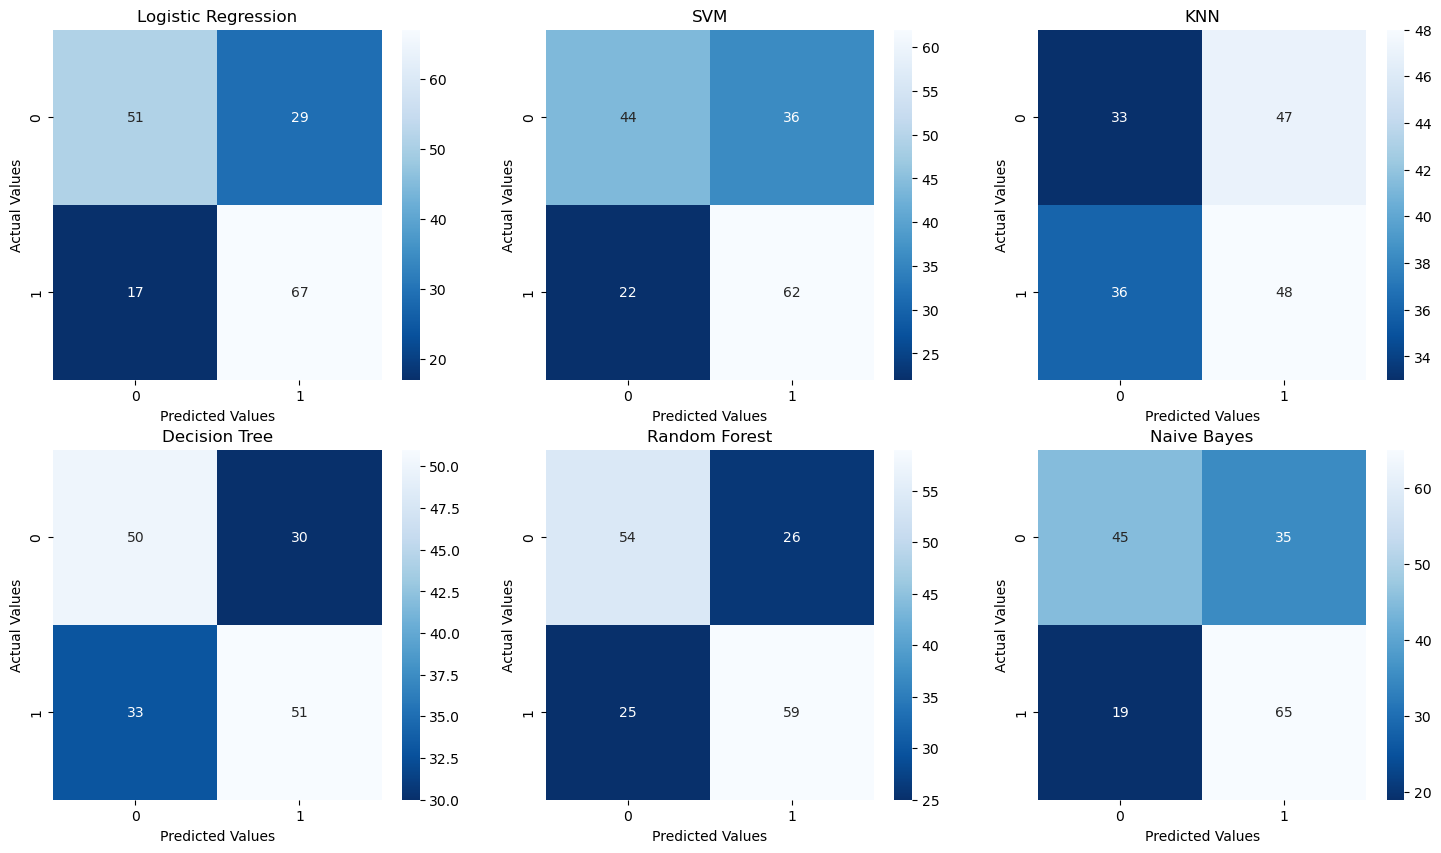

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(Dataset_cm_list)):
    cm = Dataset_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [13]:
data_labels_results = pd.DataFrame({'Model':model_list, 'Accuracy':Dataset_acc_list})
data_labels_results 

,Model,Accuracy
0,Logistic Regression,0.719512
1,SVM,0.646341
2,KNN,0.493902
3,Decision Tree,0.615854
4,Random Forest,0.689024
5,Naive Bayes,0.670732


#### Training ML Models on VADER Predictions

##### Setting up VADER Predictions

In [14]:
def format_output(output_dict):
    sentiment=False
    if(output_dict['compound']>=0.05):
        sentiment=1
    elif(output_dict['compound']<=-0.05):
        sentiment=-1
    else:
        sentiment=0
    return sentiment
def predict_sentiment(text):
    output_dict = sent_analyzer.polarity_scores(text)
    return format_output(output_dict)

# running the predictions
filtered_df['vader_prediction']=filtered_df['text'].apply(predict_sentiment)
filtered_df.sample(5)

/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_84951/4111981508.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['vader_prediction']=filtered_df['text'].apply(predict_sentiment)


,text,label,tokens,vader_prediction
1206,"When you look at JVs, we've done 1 8 years ago...",0,"[When, you, look, at, JVs, ,, we, 've, done, 1...",1
849,"Since then, a comprehensive energy audit carri...",0,"[Since, then, ,, a, comprehensive, energy, aud...",1
1546,The Meiji Group uses environmentally-friendly ...,1,"[The, Meiji, Group, uses, environmentally-frie...",1
1002,We established our price of carbon at £80 per ...,1,"[We, established, our, price, of, carbon, at, ...",1
1307,And so we spent a significant amount of energy...,0,"[And, so, we, spent, a, significant, amount, o...",1


##### Setting up for Machine Learning Models - Splitting Data and Vectorizing

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=filtered_df.text.values
y=filtered_df.vader_prediction.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(max_iter=1000))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [17]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [18]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
Vader_acc_list = []
Vader_auc_list = []
Vader_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Vader_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #pr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #Vader_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Vader_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    Vader_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #Vader_auc_list.append(round(metrics.auc(fpr, tpr),2))
    Vader_cm_list.append(confusion_matrix(y_test, y_pred))

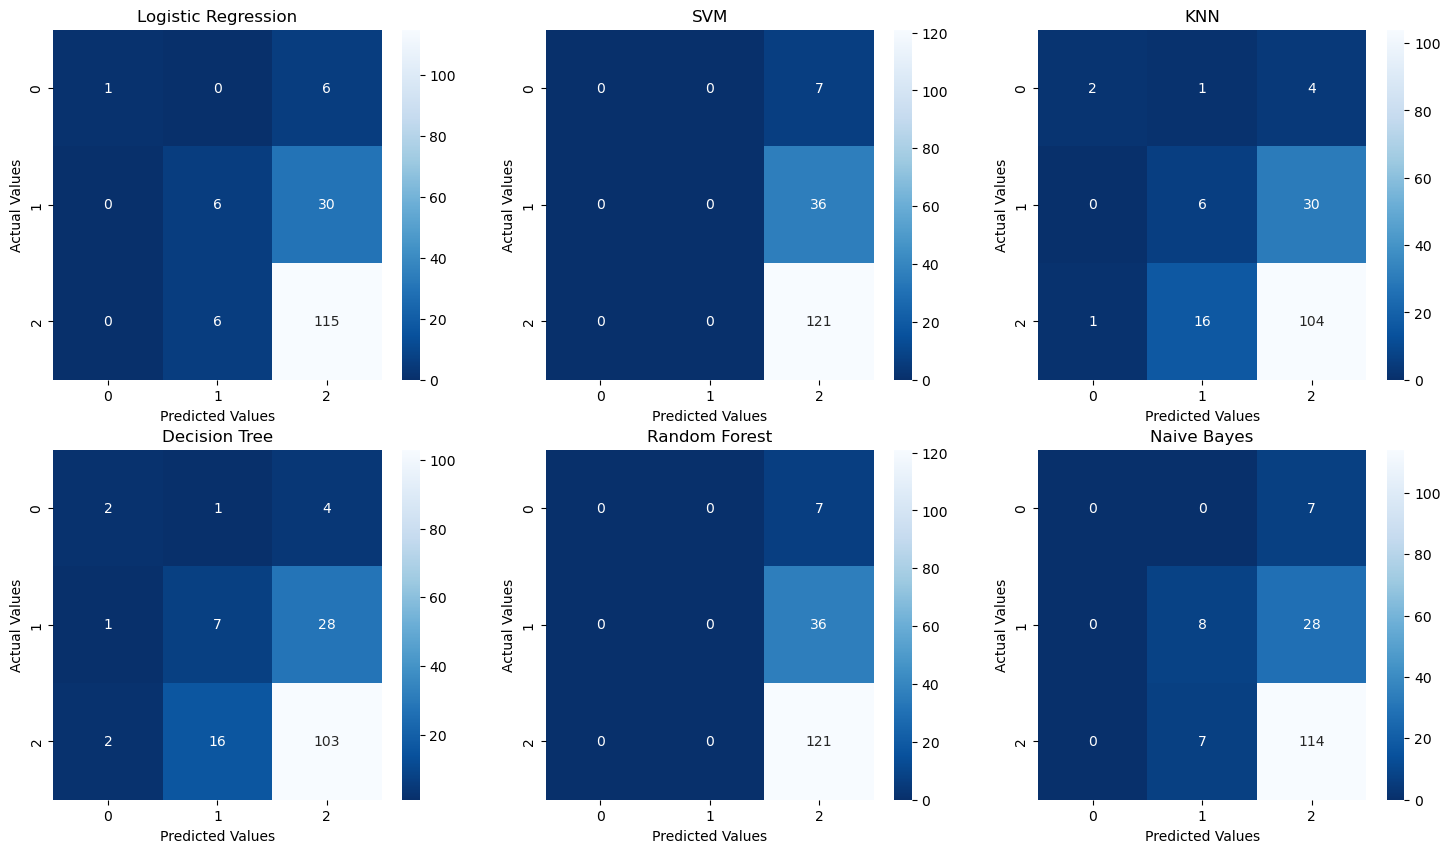

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(Vader_cm_list)):
    cm = Vader_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [20]:
VaderML_results = pd.DataFrame({'Model':model_list, 'Accuracy':Vader_acc_list})
VaderML_results

,Model,Accuracy
0,Logistic Regression,0.743902
1,SVM,0.737805
2,KNN,0.682927
3,Decision Tree,0.682927
4,Random Forest,0.737805
5,Naive Bayes,0.743902


#### Textblob & 6 Machine Learning Models

##### Setting up TextBlob Predictions

In [21]:
from textblob import TextBlob

In [22]:
def sentiment_analysis(text):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 text['TextBlob_Subjectivity'] = text['text'].apply(getSubjectivity)
 text ['TextBlob_Polarity'] = text['text'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return -1
  elif score == 0:
    return 0
  else:
    return 1
 text ['TextBlob_Analysis'] = text  ['TextBlob_Polarity'].apply(getAnalysis )
 return text

In [23]:
filtered_df = sentiment_analysis(filtered_df)

/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_84951/2437952672.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['TextBlob_Subjectivity'] = text['text'].apply(getSubjectivity)
/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_84951/2437952672.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text ['TextBlob_Polarity'] = text['text'].apply(getPolarity)
/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_84951/2437952672.py:19: SettingWithCopyWarning: 
A value is trying

In [24]:
filtered_df.head()

,text,label,tokens,vader_prediction,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,The project will make a significant contributi...,1,"[The, project, will, make, a, significant, con...",1,0.291667,0.125000,1
2,Building a smarter and stronger energy grid th...,0,"[Building, a, smarter, and, stronger, energy, ...",1,0.550000,0.450000,1
5,Our ambition is to be the preferred energy com...,0,"[Our, ambition, is, to, be, the, preferred, en...",1,0.000000,0.000000,0
6,Our Environmentally Preferable Purchasing Guid...,1,"[Our, Environmentally, Preferable, Purchasing,...",0,0.587179,-0.143590,-1
12,"In this way, it offers all occupants a more co...",0,"[In, this, way, ,, it, offers, all, occupants,...",1,0.373333,0.233333,1


##### Setting up for Machine Learning Models - Splitting Data and Vectorizing

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=filtered_df.text.values
y=filtered_df.TextBlob_Analysis.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(max_iter=1000))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [27]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [28]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
tb_acc_list = []
tb_auc_list = []
tb_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    tb_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #tb_auc_list.append(round(metrics.auc(fpr, tpr),2))
    tb_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    tb_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #tb_auc_list.append(round(metrics.auc(fpr, tpr),2))
    tb_cm_list.append(confusion_matrix(y_test, y_pred))

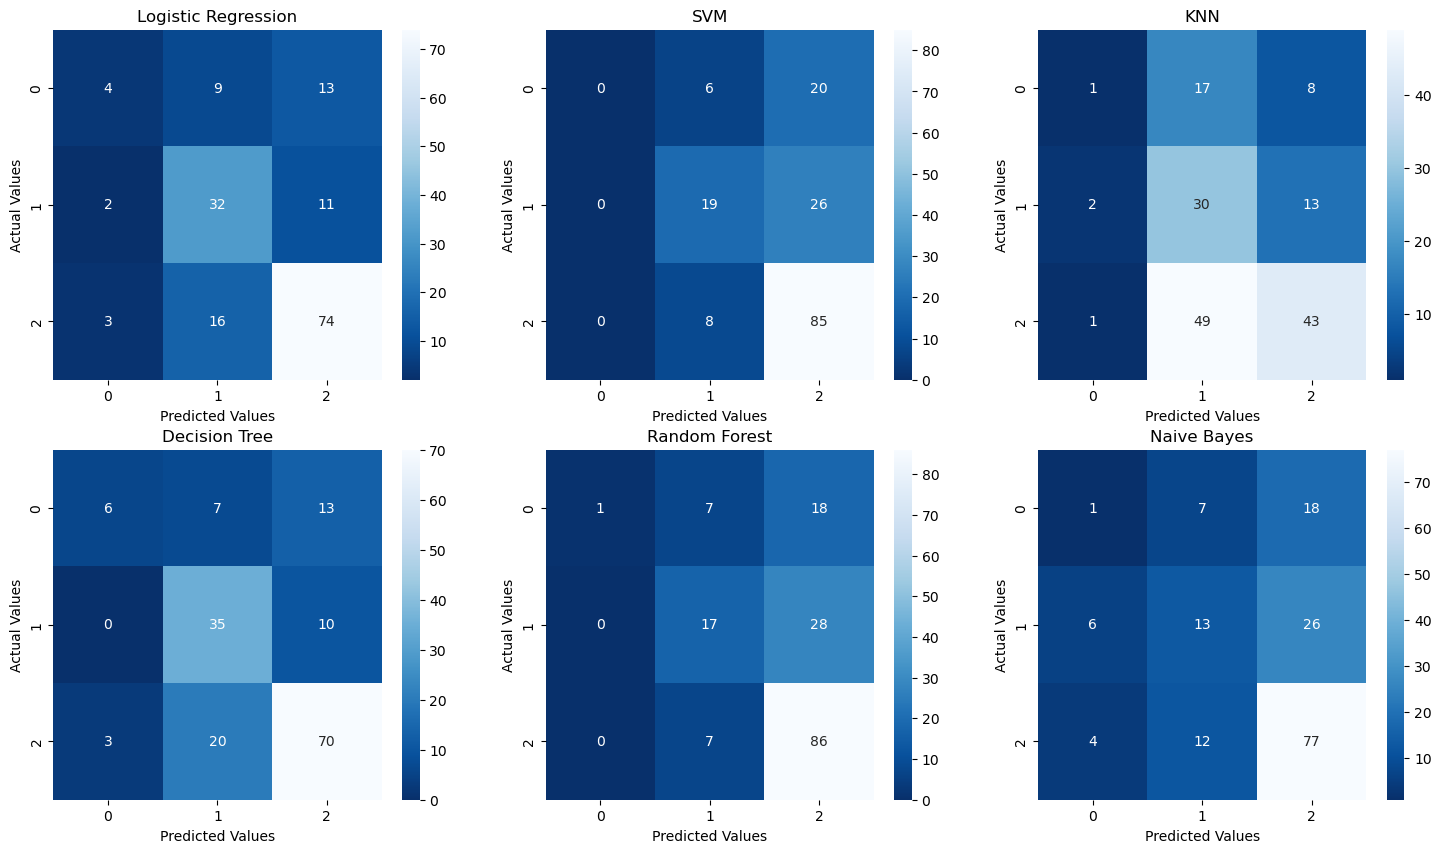

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(tb_cm_list)):
    cm = tb_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [30]:
TBML_results = pd.DataFrame({'Model':model_list, 'Accuracy':tb_acc_list})
TBML_results

,Model,Accuracy
0,Logistic Regression,0.670732
1,SVM,0.634146
2,KNN,0.451220
3,Decision Tree,0.676829
4,Random Forest,0.634146
5,Naive Bayes,0.554878


#### Flair & 6 Machine Learning Models

In [31]:
import flair
from flair.models import TextClassifier
from flair.data import Sentence
from segtok.segmenter import split_single
import re

sia = TextClassifier.load('en-sentiment')

In [32]:
def sentiment_Flair(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return 1
    else:
        return 0

In [33]:
filtered_df['Flair_Sentiment'] = filtered_df['text'].apply(lambda x: sentiment_Flair(x))

/var/folders/bn/mdffb48j50d5vh0gf4cs_6v00000gn/T/ipykernel_84951/370663139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Flair_Sentiment'] = filtered_df['text'].apply(lambda x: sentiment_Flair(x))


##### Setting up for Machine Learning Models - Splitting Data and Vectorizing

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=filtered_df.text.values
y=filtered_df.Flair_Sentiment.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train=vec.transform(X_train)
X_test=vec.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(max_iter=1000))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())

gauss_add = []
gauss_add.append(GaussianNB())

In [36]:
gnb = GaussianNB()
X_trainA = X_train.toarray()
X_testA = X_test.toarray()
gnb.fit(X_trainA, y_train)
y_pred = gnb.predict(X_testA)

In [37]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest','Naive Bayes'] 
f_acc_list = []
f_auc_list = []
f_cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #f_auc_list.append(round(metrics.auc(fpr, tpr),2))
    f_cm_list.append(confusion_matrix(y_test, y_pred))

for model in gauss_add:
    model.fit(X_trainA, y_train)
    y_pred = model.predict(X_testA)
    f_acc_list.append(metrics.accuracy_score(y_test, y_pred))
    #fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    #f_auc_list.append(round(metrics.auc(fpr, tpr),2))
    f_cm_list.append(confusion_matrix(y_test, y_pred))

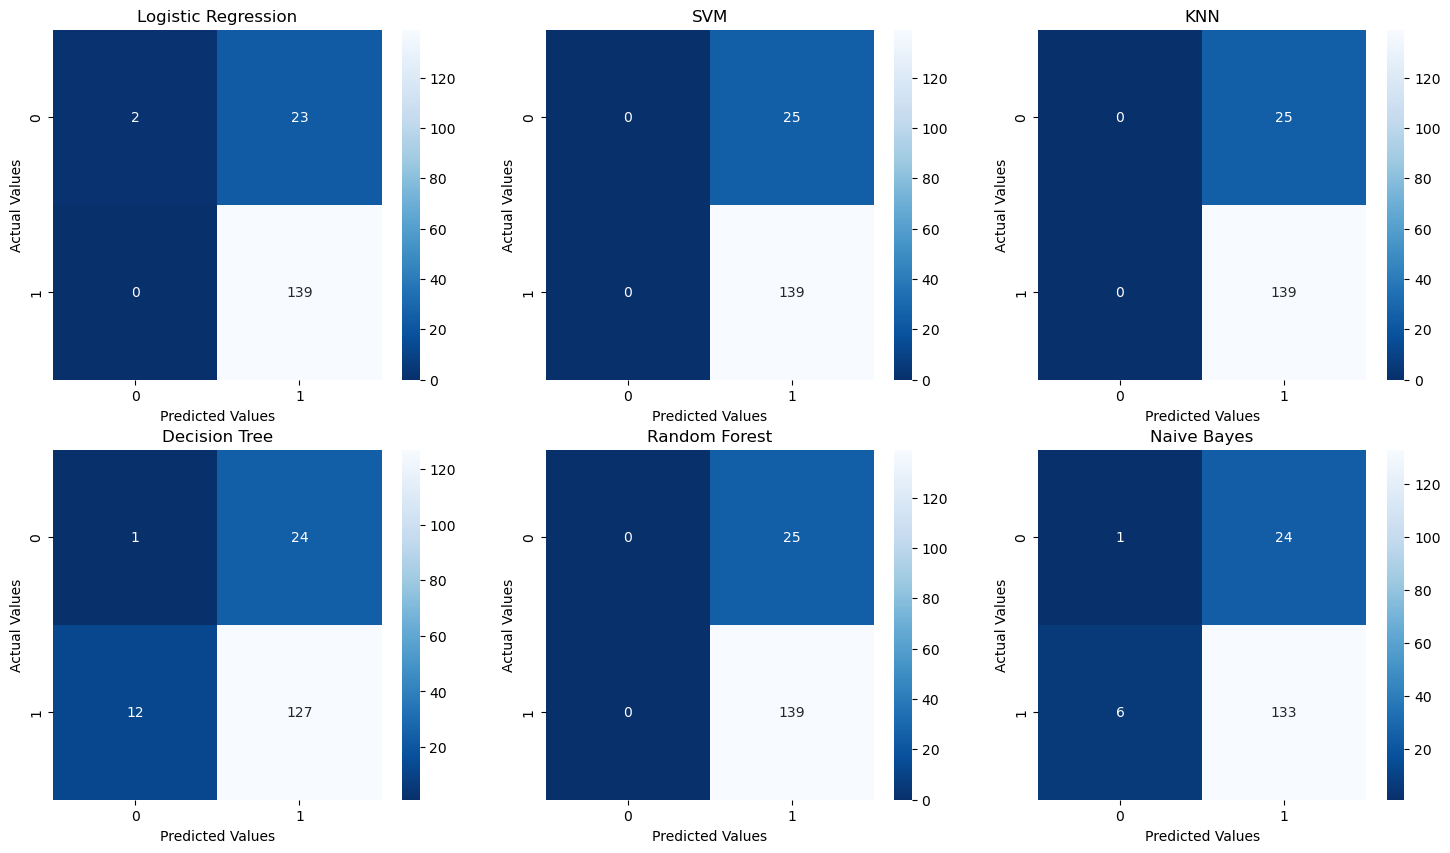

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (18,10))
for i in range(len(f_cm_list)):
    cm = f_cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

In [39]:
FlairML_results = pd.DataFrame({'Model':model_list, 'Accuracy':f_acc_list})
FlairML_results

,Model,Accuracy
0,Logistic Regression,0.859756
1,SVM,0.847561
2,KNN,0.847561
3,Decision Tree,0.780488
4,Random Forest,0.847561
5,Naive Bayes,0.817073


#### Final Results Dataframe

In [40]:
all_results = pd.DataFrame({'Model':model_list, 'Dataset Labels Accuracy': Dataset_acc_list, 'VADER Accuracy': Vader_acc_list, 'TextBlob Accuracy': tb_acc_list, 'Flair Accuracy': f_acc_list})
all_results

,Model,Dataset Labels Accuracy,VADER Accuracy,TextBlob Accuracy,Flair Accuracy
0,Logistic Regression,0.719512,0.743902,0.670732,0.859756
1,SVM,0.646341,0.737805,0.634146,0.847561
2,KNN,0.493902,0.682927,0.451220,0.847561
3,Decision Tree,0.615854,0.682927,0.676829,0.780488
4,Random Forest,0.689024,0.737805,0.634146,0.847561
5,Naive Bayes,0.670732,0.743902,0.554878,0.817073
